# **Feature Important**

## **Install and Load Package**

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042899 sha256=cbab1fbd179a0707aa3dea48f6833b60350d0ef6ba384ff48ff5d0557578bcb8
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0a1ac791b27e28ed4daf745364ee65f886dd200142d553c015b39f658a6be312
  Stored in dir

In [2]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# load xgboost classifier model
from xgboost import XGBClassifier
#load svm classifier model
from sklearn.svm import SVC
# load gradient boosting classifier model
from sklearn.ensemble import GradientBoostingClassifier

# load scikit-plot modules
import scikitplot as skplt

# Load DALEX untuk interpretability
import dalex as dx


%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## **Load Dataset**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

In [4]:
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data = df.copy()

## **Data Inspection**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [7]:
df.describe()

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### **Data Manipulation**

In [8]:
# ubah tipe data user_id also just drop it

df = df.drop('user_id', axis=1)

In [9]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
df['attrition_flag'].replace(['Attrited Customer', 'Existing Customer'],[1,0],inplace=True)

<ipython-input-17-d65eb64bf8f7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attrition_flag'].replace(['Attrited Customer', 'Existing Customer'],[1,0],inplace=True)


In [18]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### **Missing Value**

In [10]:
df.isna().sum()

,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0
total_relationship_count,0


In [11]:
cat = df.select_dtypes(include=['object']).columns

for column in cat:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= attrition_flag =================


,count
attrition_flag,
Existing Customer,8500
Attrited Customer,1627



============= gender =================


,count
gender,
F,5358
M,4769



============= education_level =================


,count
education_level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451



============= marital_status =================


,count
marital_status,
Married,4687
Single,3943
Unknown,749
Divorced,748



============= income_category =================


,count
income_category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727



============= card_category =================


,count
card_category,
Blue,9436
Silver,555
Gold,116
Platinum,20


### **Duplicate**

In [12]:
df.duplicated().sum()

0

## **Simple EDA**

### **1. a.**

Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?


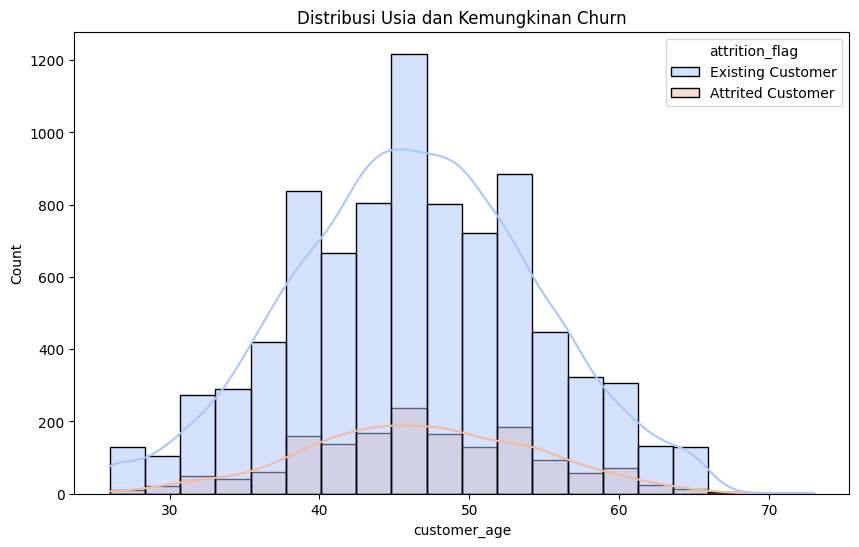

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="customer_age", hue="attrition_flag", bins=20, kde=True, palette="coolwarm")
plt.title("Distribusi Usia dan Kemungkinan Churn")
plt.show()

In [14]:
churn_count_by_age = df[df['attrition_flag'] == 'Attrited Customer'].groupby('customer_age').size()
print("Usia dengan jumlah churn terbesar:", churn_count_by_age.idxmax())

Usia dengan jumlah churn terbesar: 43


Usia customer terdistribusi normal.

### **1. b.**

Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

In [15]:
from scipy.stats import chi2_contingency

education_income_crosstab = pd.crosstab(df["education_level"], df["income_category"])

chi2_stat, p_val, _, _ = chi2_contingency(education_income_crosstab)

print(f"Chi-square test antara tingkat pendidikan dan income: p-value = {p_val}")

if p_val < 0.05:
    print("Terdapat hubungan signifikan antara tingkat pendapatan dan pendapatan nasabah.")
else:
    print("Tidak terdapat hubungan signifikan antara tingkat pendapatan dan pendapatan nasabah.")

Chi-square test antara tingkat pendidikan dan income: p-value = 0.03655347346001099
Terdapat hubungan signifikan antara tingkat pendapatan dan pendapatan nasabah.


<Figure size 1200x600 with 0 Axes>

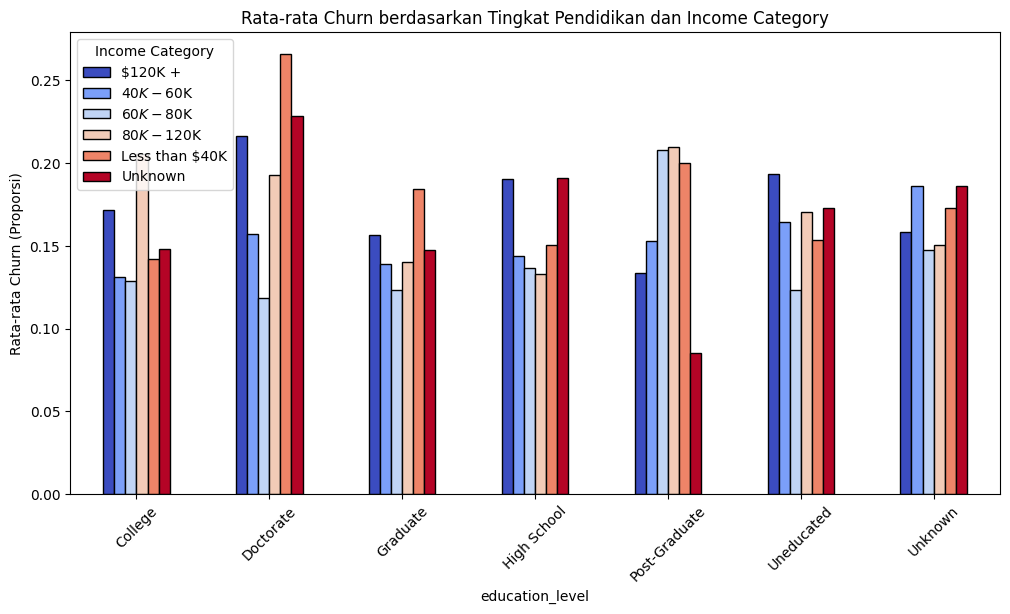

In [19]:
plt.figure(figsize=(12, 6))
grouped_data = df.groupby(["education_level", "income_category"])["attrition_flag"].mean().unstack()
grouped_data.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Rata-rata Churn berdasarkan Tingkat Pendidikan dan Income Category")
plt.ylabel("Rata-rata Churn (Proporsi)")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()


Dari gambar di atas, education level 'Doctorate' dengan income category 'less than 40k' memiliki kecenderungan churn yang tinggi

### **1. c.**

Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

In [20]:
from scipy.stats import chi2_contingency, ttest_ind
import scipy.stats as stats

gender_churn_crosstab = pd.crosstab(df["gender"], df["attrition_flag"])

chi2_stat, p_val, _, _ = stats.chi2_contingency(gender_churn_crosstab)

print(f"Chi-square test antara gender dan churn: p-value = {p_val}")

if p_val < 0.05:
    print("Terdapat perbedaan signifikan antara gender dengan kemungkinan churn.")
else:
    print("Tidak terdapat perbedaan signifikan antara gender dengan kemungkinan churn.")


Chi-square test antara gender dan churn: p-value = 0.00019635846717310307
Terdapat perbedaan signifikan antara gender dengan kemungkinan churn.


### **1. d.**

Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?


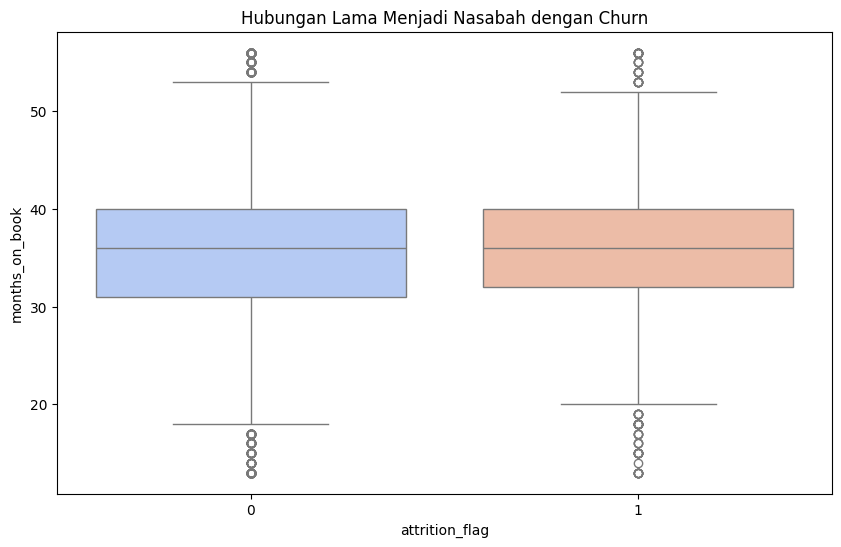

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="attrition_flag", y="months_on_book", data=df, hue="attrition_flag", palette="coolwarm", legend=False)
plt.title("Hubungan Lama Menjadi Nasabah dengan Churn")
plt.show()


Baik customer yang stay dan churn, keduanya memiliki rentang dan median durasi menjadi pelanggan yang hampir sama. Tidak ada perbedaan yang signifikan antara lama customer menjadi nasabah dengan kemungkinan untuk churn.

### **1. e.**

Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

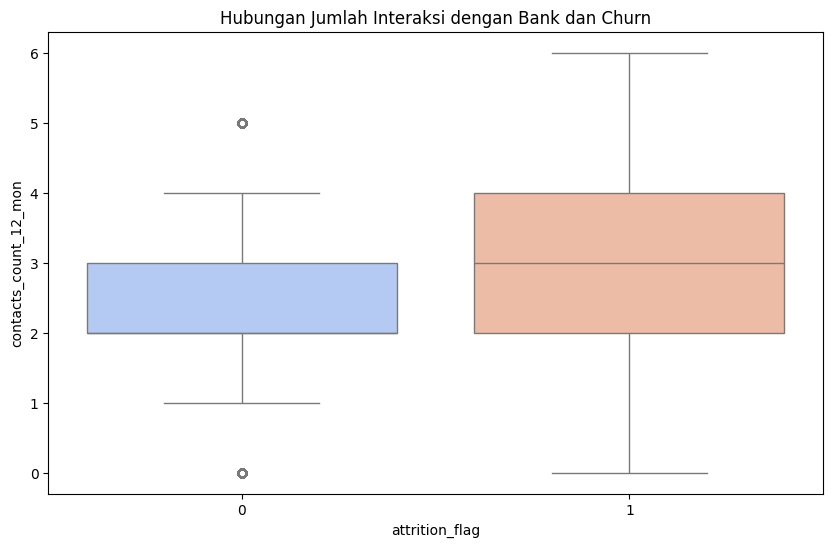

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="attrition_flag", y="contacts_count_12_mon", hue="attrition_flag", data=df, palette="coolwarm", legend=False)
plt.title("Hubungan Jumlah Interaksi dengan Bank dan Churn")
plt.show()


Customer yang churn cenderung memiliki interaksi yang lebih banyak dengan bank

## **Train-Test Split**

In [23]:
X = df.drop(["attrition_flag"], axis = 1)
y = df["attrition_flag"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify = y,
    random_state=96
)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (7595, 19), Testing set: (2532, 19)


## **Train**

### **EDA**

In [25]:
nums = X_train.select_dtypes(exclude=['object']).columns

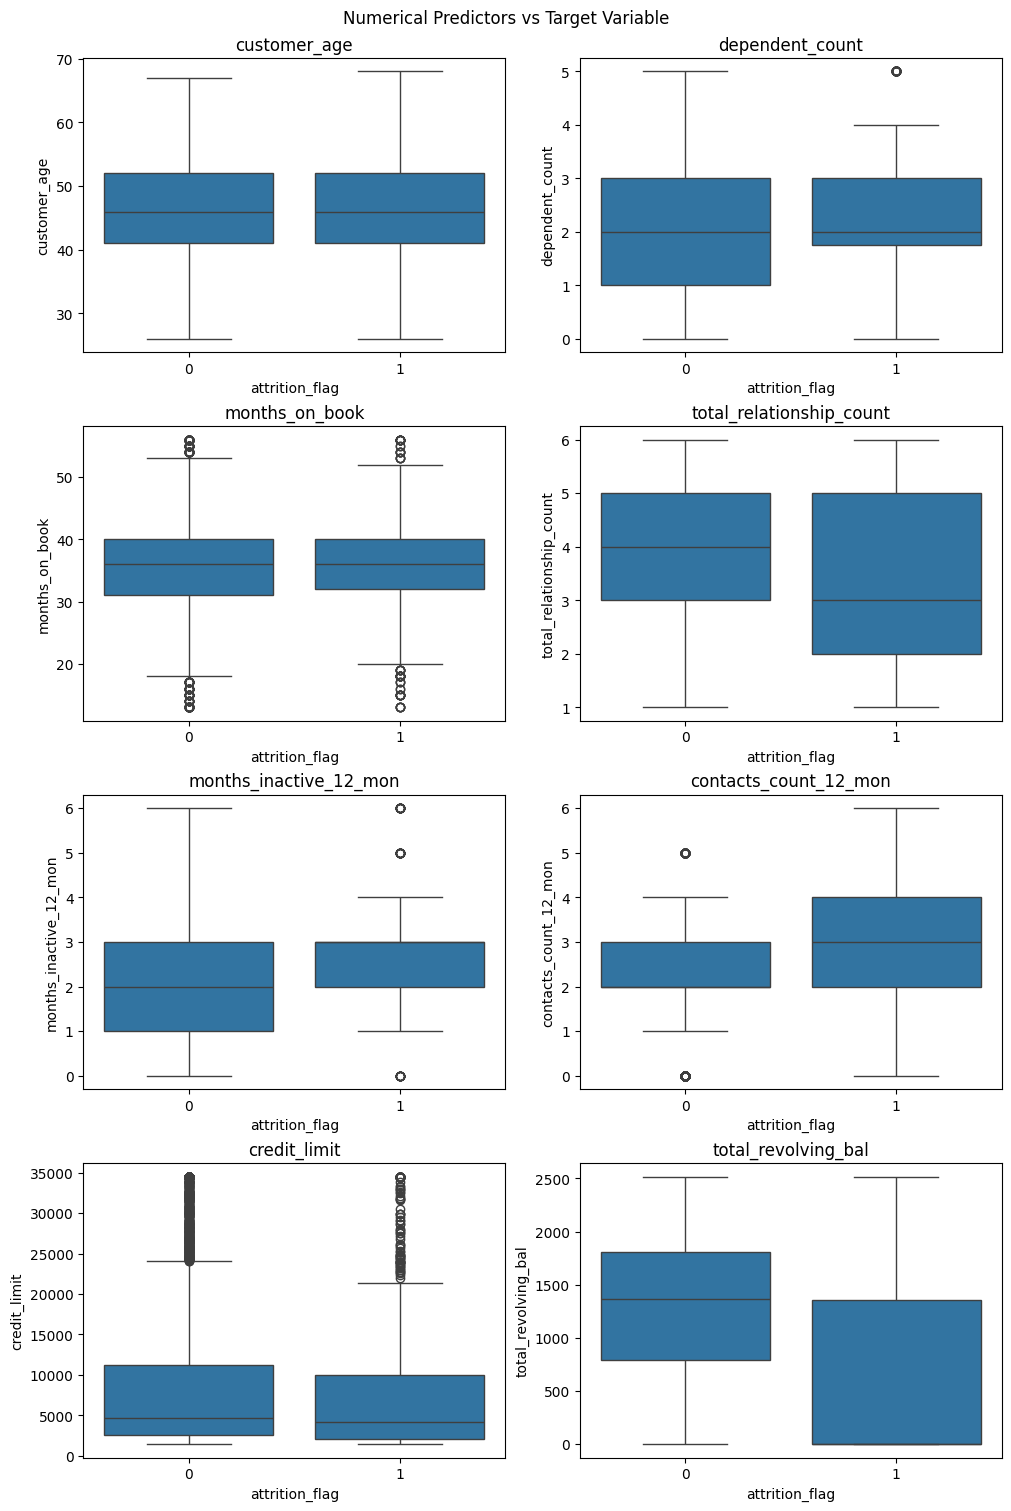

In [26]:
fig, axes = plt.subplots(4,2, sharex=False, sharey = False, figsize=(10,15), constrained_layout = True)

fig.suptitle('Numerical Predictors vs Target Variable')

col_index = 0

for row in range(4):
  for col in range(2):
    sns.boxplot(ax = axes[row,col], x=y_train, y = X_train[nums[col_index]])
    axes[row,col].set_title(nums[col_index])
    col_index += 1

In [27]:
df_analysis = pd.concat([X_train, y_train], axis=1)

numerical_cols = df_analysis.select_dtypes(include=[np.number]).columns

churn_stats = df_analysis.groupby('attrition_flag')[numerical_cols].describe()

churn_stats

customer_age                                               \
                      count       mean       std   min   25%   50%   75%   
attrition_flag                                                             
0                    6375.0  46.362667  8.048172  26.0  41.0  46.0  52.0   
1                    1220.0  46.467213  7.666109  26.0  41.0  46.0  52.0   

                     dependent_count                                           \
                 max           count      mean       std  min   25%  50%  75%   
attrition_flag                                                                  
0               67.0          6375.0  2.324235  1.301131  0.0  1.00  2.0  3.0   
1               68.0          1220.0  2.399180  1.274022  0.0  1.75  2.0  3.0   

                    months_on_book                                         \
                max          count       mean       std   min   25%   50%   
attrition_flag                                                              
0               5.0         6375.0  35.945255  8.026567  13.0  31.0  36.0   
1               5.0         1220.0  35.975410  7.854254  13.0  32.0  36.0   

                           total_relationship_count                           \
                 75%   max                    count      mean       std  min   
attrition_flag                                                                 
0               40.0  56.0                   6375.0  3.923765  1.523632  1.0   
1               40.0  56.0                   1220.0  3.286885  1.573882  1.0   

                                   months_inactive_12_mon                      \
                25%  50%  75%  max                  count      mean       std   
attrition_flag                                                                  
0               3.0  4.0  5.0  6.0                 6375.0  2.279216  1.020883   
1               2.0  3.0  5.0  6.0                 1220.0  2.672951  0.895027   

                                        contacts_count_12_mon            \
                min  25%  50%  75%  max                 count      mean   
attrition_flag                                                            
0               0.0  1.0  2.0  3.0  6.0                6375.0  2.360941   
1               0.0  2.0  3.0  3.0  6.0                1220.0  2.989344   

                                                  credit_limit               \
                     std  min  25%  50%  75%  max        count         mean   
attrition_flag                                                                
0               1.075767  0.0  2.0  2.0  3.0  5.0       6375.0  8754.197051   
1               1.085689  0.0  2.0  3.0  4.0  6.0       1220.0  8203.393934   

                                                                        \
                        std     min     25%     50%       75%      max   
attrition_flag                                                           
0               9120.112405  1438.3  2604.5  4661.0  11200.00  34516.0   
1               9135.166201  1438.3  2114.0  4196.0  10016.25  34516.0   

               total_revolving_bal                                       \
                             count         mean         std  min    25%   
attrition_flag                                                            
0                           6375.0  1256.562824  758.296131  0.0  796.0   
1                           1220.0   696.873770  928.702045  0.0    0.0   

                                       avg_open_to_buy               \
                   50%     75%     max           count         mean   
attrition_flag                                                        
0               1362.0  1811.0  2517.0          6375.0  7497.634227   
1                  0.0  1360.0  2517.0          1220.0  7506.520164   

                                                                     \
                        std   min      25%     50%     75%      max   
attrition_flag    

### **Outlier**

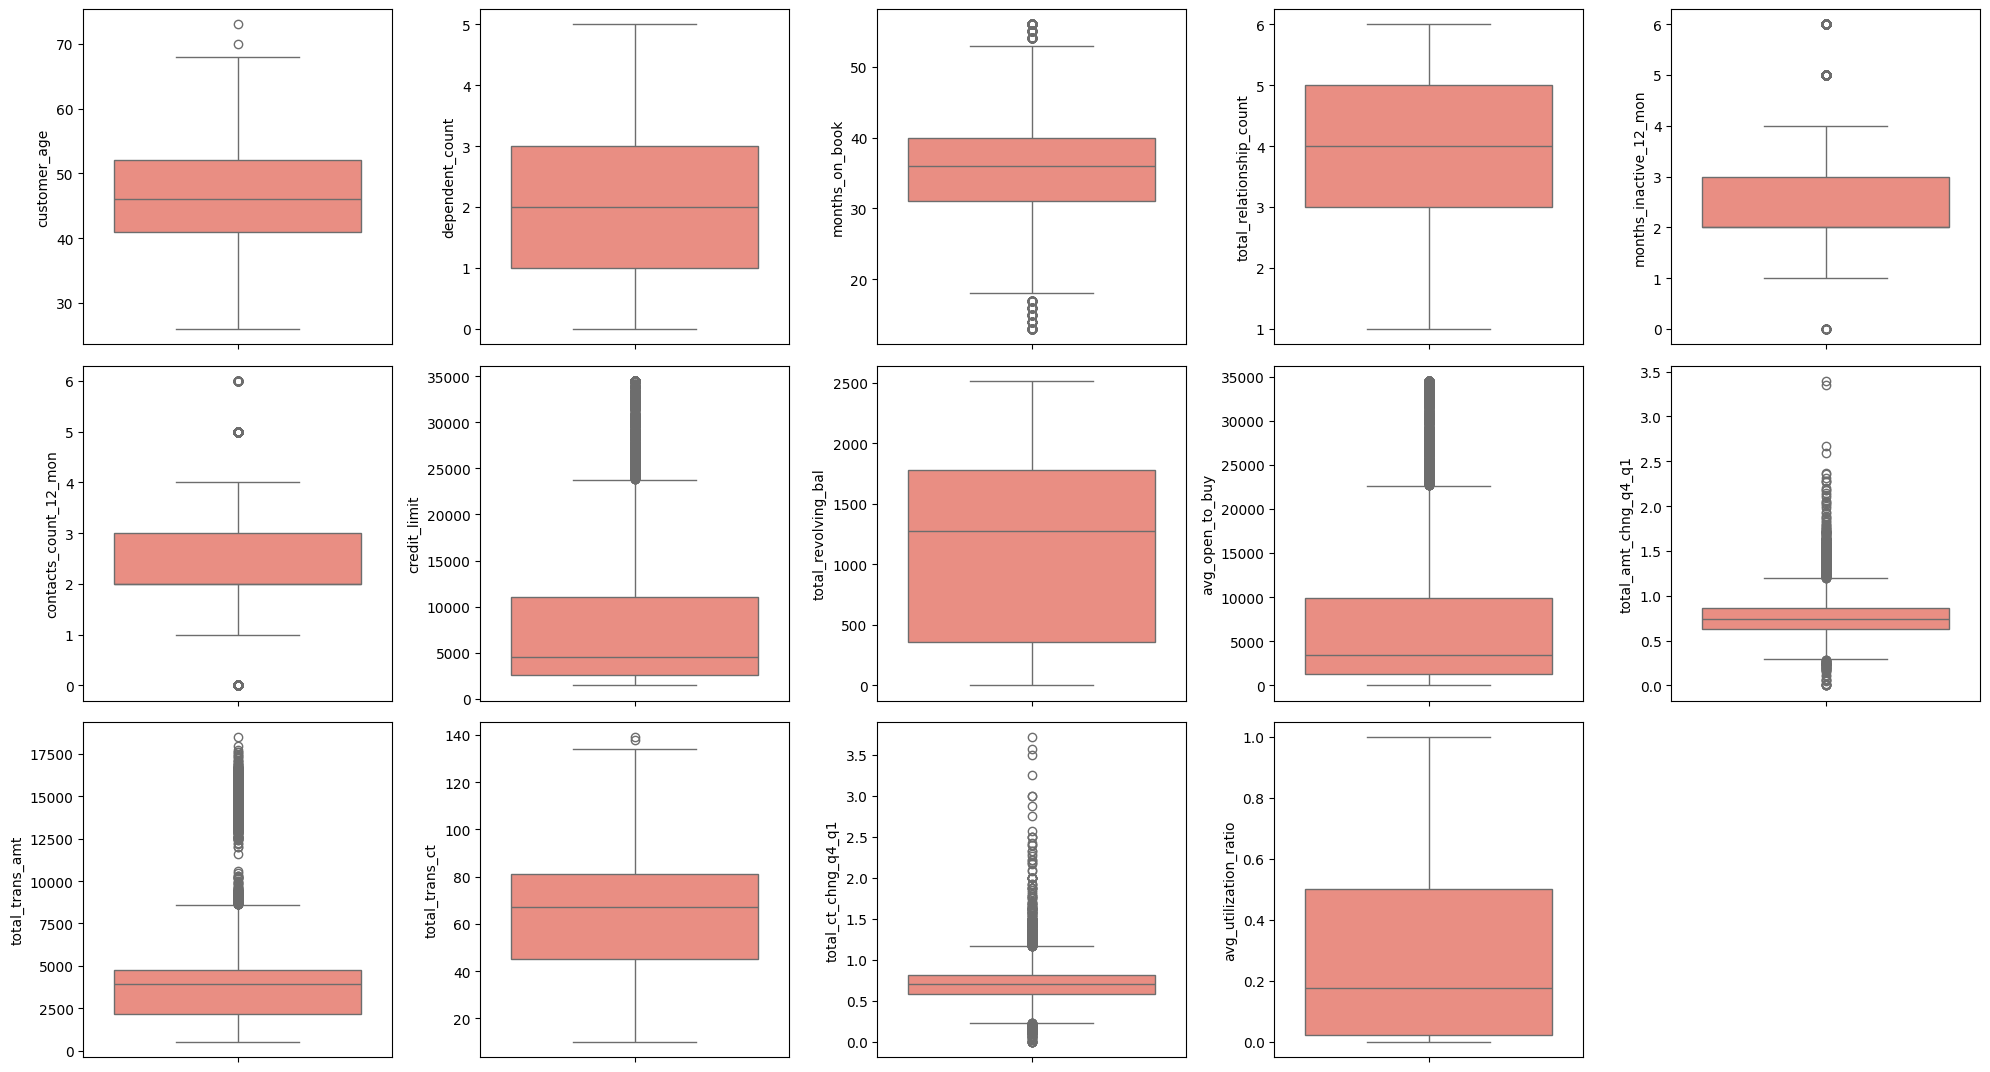

In [28]:
plt.figure(figsize=(20,50))

for i in range(0, len(nums)):
    plt.subplot(len(nums), 5, i+1)
    sns.boxplot(y=df[nums[i]], color='salmon', orient='v')
    plt.tight_layout()

### **Multicolinearity**

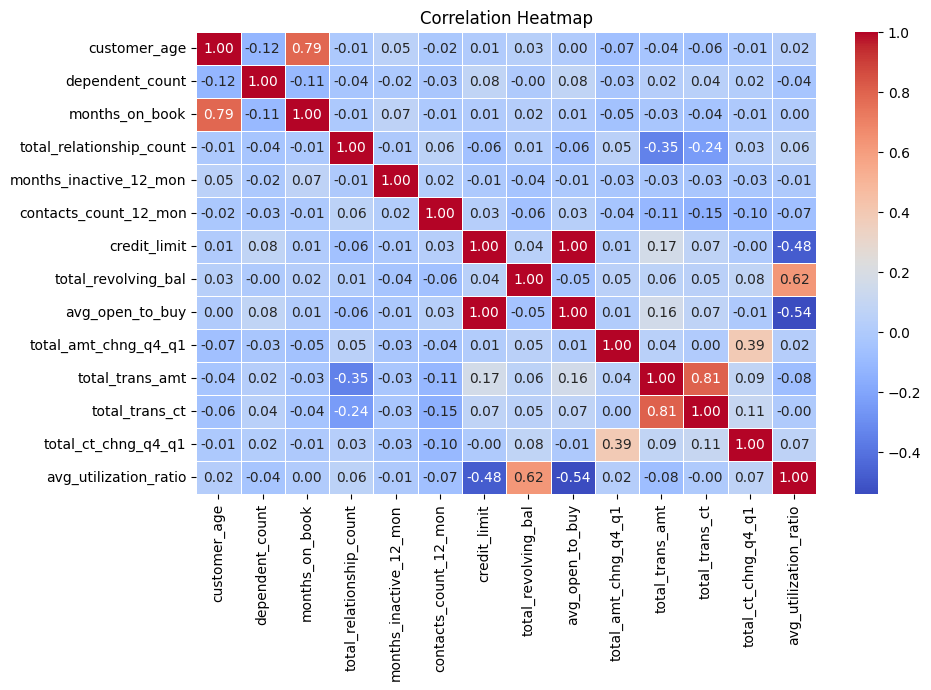

In [29]:
df_corr_numeric = X_train.select_dtypes(include=[np.number])

corr_matrix = df_corr_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Feature with high correlation:
- avg_open_to_buy & credit_limit (1.00)
- total_trans_ct & total_trans_amt (0.80)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF score
X = df[['avg_open_to_buy', 'credit_limit', 'total_trans_ct', 'total_trans_amt']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

           Feature         VIF
0  avg_open_to_buy  184.418756
1     credit_limit  205.634524
2   total_trans_ct    8.961231
3  total_trans_amt    6.153596


Berdasarkan nilai VIF dan definisi dari fitur, akan di-drop fitur 'avg_open_to_buy' dan 'total_trans_amt'

In [31]:
X_train = X_train.drop(columns=['avg_open_to_buy', 'total_trans_amt'])

In [32]:
X_train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
7714,42,F,2,Uneducated,Married,Unknown,Blue,32,5,5,3,4708.0,0,0.718,89,0.679,0.000
8055,56,M,3,Graduate,Married,$120K +,Blue,46,2,1,2,7234.0,2055,0.703,83,0.660,0.284
1726,28,F,0,Unknown,Single,Unknown,Blue,13,5,3,2,21691.0,661,0.767,51,0.962,0.030
4030,38,F,4,Graduate,Single,Less than $40K,Blue,26,2,2,2,4391.0,1933,0.579,36,0.385,0.440
8457,37,F,2,Graduate,Married,Less than $40K,Blue,31,1,3,3,2984.0,0,0.770,86,0.870,0.000


### **Encoding**

In [33]:

education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': -1
}

income_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': -1
}


X_train['education_level'] = X_train['education_level'].map(education_mapping)

X_train['income_category'] = X_train['income_category'].map(income_mapping)

label_encoder = LabelEncoder()
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])

X_train = pd.get_dummies(X_train, columns=['marital_status', 'card_category'], drop_first=True)


In [34]:
X_train.head()

,customer_age,gender,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
7714,42,0,2,0,-1,32,5,5,3,4708.0,0,0.718,89,0.679,0.000,True,False,False,False,False,False
8055,56,1,3,3,4,46,2,1,2,7234.0,2055,0.703,83,0.660,0.284,True,False,False,False,False,False
1726,28,0,0,-1,-1,13,5,3,2,21691.0,661,0.767,51,0.962,0.030,False,True,False,False,False,False
4030,38,0,4,3,0,26,2,2,2,4391.0,1933,0.579,36,0.385,0.440,False,True,False,False,False,False
8457,37,0,2,3,0,31,1,3,3,2984.0,0,0.770,86,0.870,0.000,True,False,False,False,False,False


## **Training Model**

In [35]:
y_train.value_counts(normalize=True)

,proportion
attrition_flag,
0,0.839368
1,0.160632


### **Random Forest**

In [36]:
rf_clf = RandomForestClassifier(
    class_weight = {0: 160632, 1: 0.839368},
    random_state = 1000,
    n_estimators=100
)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 160632, 1: 0.839368}, random_state=1000)

### **XGBoost**

In [37]:
xgb_clf = XGBClassifier(
    class_weight = {0: 160632, 1: 0.839368},
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 160632, 1: 0.839368}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### **Gradient Boosting**

In [38]:
gb_clf=GradientBoostingClassifier(
    n_estimators = 100,
    learning_rate = 1.0,
    max_depth = 1,
    random_state = 1000)

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1000)

### **SVM**

In [39]:
svm_clf = SVC(
    class_weight = {0: 160632, 1: 0.839368},
    probability=True,
    random_state=42
    )

svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 160632, 1: 0.839368}, probability=True, random_state=42)

## **Test**

In [40]:
# Drop fitur yang sebelumnya telah di-drop

X_test = X_test.drop(columns=['avg_open_to_buy', 'total_trans_amt'])

### **Encoding**

In [41]:
X_test['education_level'] = X_test['education_level'].map(education_mapping)

X_test['income_category'] = X_test['income_category'].map(income_mapping)

X_test['gender'] = label_encoder.transform(X_test['gender'])

X_test = pd.get_dummies(X_test, columns=['marital_status', 'card_category'], drop_first=True)

## **Model Evaluation**

In [42]:
# Random Forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# Gradient Boosting prediction
gb_pred = gb_clf.predict(X_test)
gb_pred_proba = gb_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

# SVM prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)


### **Classification Report**

In [43]:
# Random Forest

pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.947008,0.848397,0.933649,0.897702,0.931157
recall,0.975529,0.714988,0.933649,0.845259,0.933649
f1-score,0.961057,0.776000,0.933649,0.868529,0.931310
support,2125.000000,407.000000,0.933649,2532.000000,2532.000000


In [44]:
# XGBoost

pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.957929,0.856369,0.943128,0.907149,0.941604
recall,0.975059,0.776413,0.943128,0.875736,0.943128
f1-score,0.966418,0.814433,0.943128,0.890425,0.941987
support,2125.000000,407.000000,0.943128,2532.000000,2532.000000


In [45]:
# Gradient Boosting

pd.DataFrame(metrics.classification_report(y_test, gb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.952425,0.828338,0.934439,0.890381,0.932479
recall,0.970353,0.746929,0.934439,0.858641,0.934439
f1-score,0.961305,0.785530,0.934439,0.873418,0.933051
support,2125.000000,407.000000,0.934439,2532.000000,2532.000000


In [46]:
# SVM

pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['0','1'], output_dict=True))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.839258,0.0,0.839258,0.419629,0.704353
recall,1.000000,0.0,0.839258,0.500000,0.839258
f1-score,0.912605,0.0,0.839258,0.456302,0.765910
support,2125.000000,407.0,0.839258,2532.000000,2532.000000


### **Confusion Matrix**

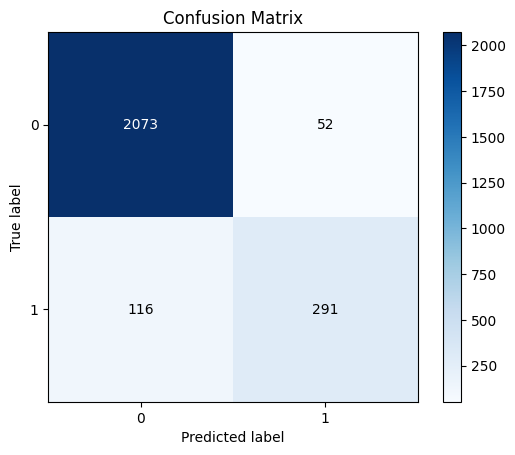

In [47]:
# Random Forest

skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

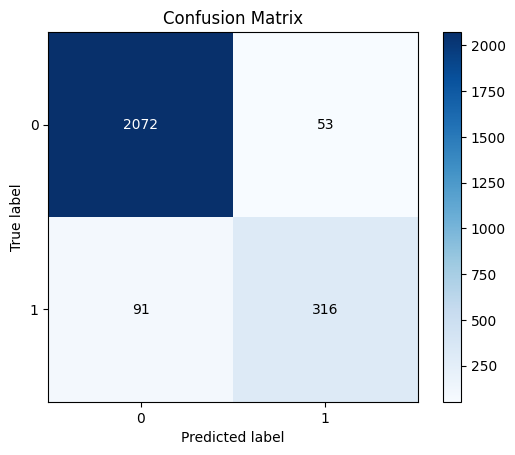

In [48]:
# XGBoost

skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

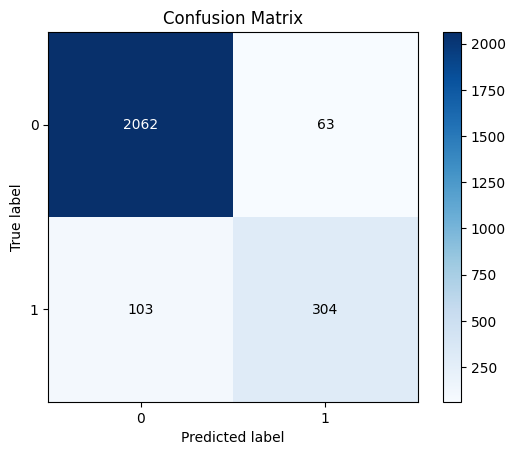

In [49]:
# Gradient Boosting

skplt.metrics.plot_confusion_matrix(y_test, gb_pred);

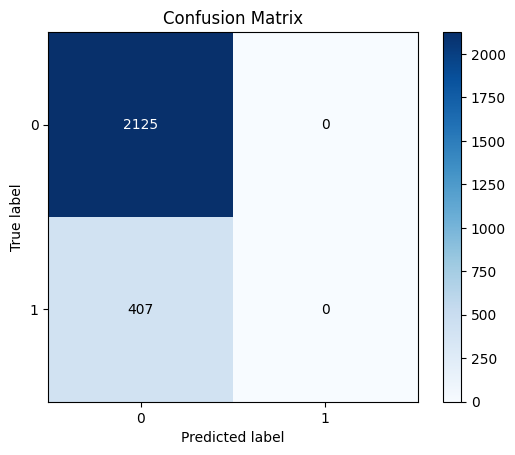

In [50]:
# SVM

skplt.metrics.plot_confusion_matrix(y_test, svm_pred);

### **ROC-AUC**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x600 with 0 Axes>

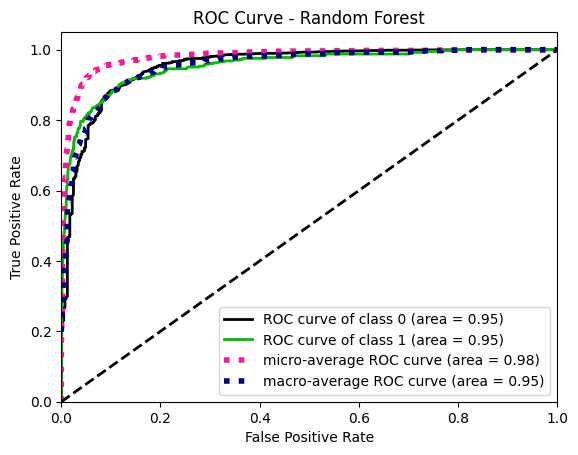

In [51]:
# Random Forest

plt.figure(figsize=(10, 6))
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x600 with 0 Axes>

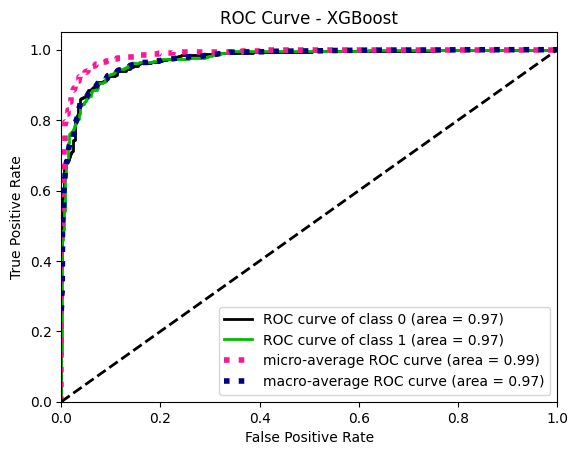

In [52]:
# XGBoost

plt.figure(figsize=(10, 6))
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba)
plt.title("ROC Curve - XGBoost")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x600 with 0 Axes>

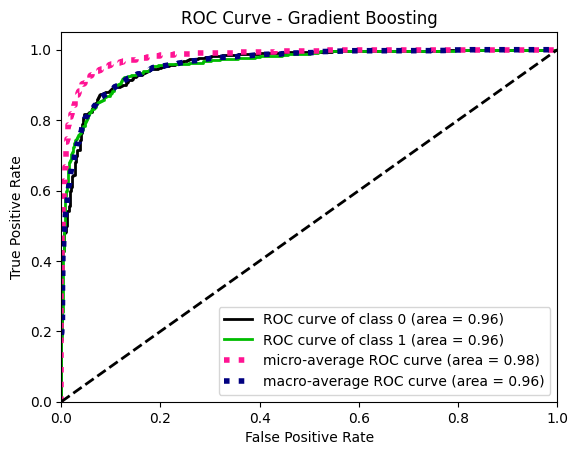

In [53]:
# Gradient Boosting
plt.figure(figsize=(10, 6))
skplt.metrics.plot_roc_curve(y_test, gb_pred_proba)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1000x600 with 0 Axes>

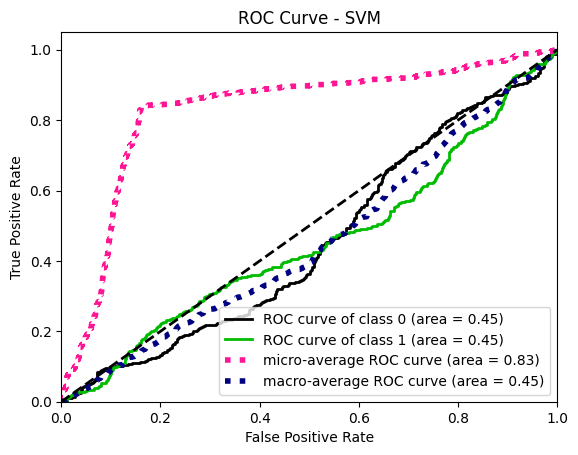

In [54]:
# SVM

plt.figure(figsize=(10, 6))
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba)
plt.title("ROC Curve - SVM")
plt.show()

## **Model Agnostic**

Berdasarkan hasil pemodelan, model **XGBoost menunjukkan hasil yang paling baik** dengan nilai Recall untuk kategori Churn/Attrited_Customer yang diwakili oleh angka 1 sebesar 74% dan accuracy sebesar 93%. Selain itu, plot ROC menunjukkan nilai sebesar 0.97.

### **Feature Importance**

In [55]:
# Initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label="XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7595 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b670c0c9080> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.59e-07, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.588, mean = -2.28e-06, max = 0.786
  -> model_info        : package xgboost

A new explainer has been created!


In [56]:
churn_xgb_exp.model_parts().plot()

### **Partial Dependence Plot**

In [57]:
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.42 26.84 ... 67.16 67.58 68.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|▉         | 2/21 [00:00<00:01, 13.51it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated an

### **Result**

Feature Importance menunjukkan fitur 'total_trans_ct' merupakan fitur yang memberikan dampak paling besar terhadap prediksi churn. Selanjutnya, fitur 'total_revolving_bal' dan 'total_relationship_count' merupakan dua fitur lain yang memberikan dampak paling besar setelah 'total_trans_ct'. Fitur-fitur lainnya yang memberikan dampak adalah 'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'credit_limit','contacts_count_12_mon', 'months_inactive_12_mon',  'customer_age', dan 'months_on_book'.



- total_trans_ct<br>
Merupakan fitur yang memiliki dampak paling besar terhadap prediksi Churn. Dari analisis PDP, pelanggan dengan jumlah transaksi di bawah 91 lebih mungkin mengalami churn. Selain itu, hasil EDA juga menunjukkan pelanggan yang churn cenderung memiliki lebih sedikit transaksi dan nilai transaksi lebih kecil. Hal ini menunjukkan bahwa semakin sedikit transaksi yang dilakukan, semakin tinggi kemungkinan pelanggan untuk berhenti menggunakan layanan.

- total_revolving_bal<br>
Grafik PDP menunjukkan tren menurun, yang berarti pelanggan dengan saldo revolving balance yang lebih rendah cenderung lebih mungkin churn.

- total_relationship_count<br>
Kurva PDP menunjukkan bahwa semakin sedikit hubungan pelanggan dengan perusahaan seperti, jumlah produk yang digunakan, semakin tinggi kemungkinan mereka churn.

- total_amt_chng_q4_a1 dan total_ct_chng_q4_q1 <br>
Grafik PDP kedua fitur ini menunjukkan bahwa penurunan jumlah dan nominal transaksi dari kuartal ke kuartal meningkatkan risiko pelanggan untuk churn.

- credit limit<br>
Kurva PDP fitur ini cenderung stabil.

- months_inactive_12_mon <br>
Grafik PDP menunjukkan bahwa pelanggan yang memiliki periode tidak aktif lebih panjang cenderung lebih mungkin untuk churn.

- contacts_count_12_mon<br>
Tren naik yang ditunjukkan oleh kurva PDP menunjukkan bahwa pelanggan yang lebih sering menghubungi customer service memiliki kemungkinan churn yang tinggi.

- customer_age dan months_on_book<br>
Kedua fitur ini tidak menunjukkan pola yang sangat kuat, tetapi tetap memberikan kontribusi dalam model.

### **Rekomendasi**

Berikut beberapa strategi yang dapat diterapkan untuk mengurangi Churn berdasarkan hasil analisis:
- Meningkatkan frekuensi dan nominal transaksi dari pelanggan seperti dengan memberikan diskon atau cashback untuk transaksi tertentu
- Meningkatkan jumlah produk yang digunakan oleh pelanggan
- Memonitor pelanggan dengan saldo rendah dan memberikan mereka penawaran yang meningkatkan kemungkinan mereka untuk terus menggunakan layanan.
- Mengidentifikasi pelanggan yang menunjukkan tanda-tanda inaktivitas lebih lama dan take an action seperti, memberikan penawaran eksklusif
- Meningkatkan layanan

## **Extra**

In [58]:
# Initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf, X_train, y_train, label="RF Interpretation")

# Initiate explainer for Gradient Boosting model
churn_gb_exp = dx.Explainer(gb_clf, X_train, y_train, label="Gradient Boosting Interpretation")

# Initiate explainer for SVM model
churn_svm_exp = dx.Explainer(svm_clf, X_train, y_train, label="SVM Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7595 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b670c0c9080> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.163, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.4, mean = -0.00265, max = 0.5
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 7595 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a num

In [59]:
churn_rf_exp.model_parts().plot()

In [60]:
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.42 26.84 ... 67.16 67.58 68.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   5%|▍         | 1/21 [00:00<00:06,  3.14it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|▉         | 2/21 [00:00<00:06,  3.15it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:

In [61]:
churn_gb_exp.model_parts().plot()

In [62]:
churn_gb_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.42 26.84 ... 67.16 67.58 68.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.05 0.1  ... 4.9  4

In [63]:
churn_svm_exp.model_parts().plot()

In [64]:
churn_svm_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/21 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.42 26.84 ... 67.16 67.58 68.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   5%|▍         | 1/21 [00:05<01:41,  5.06s/it]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  10%|▉         | 2/21 [00:08<01:22,  4.32s/it]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py: